# Name- Rohit Singh
# #GRIPDEC20
# Task 3

In [1]:
# importing essentisl libraries
import numpy as np
import pandas as pd
import requests
import io
import seaborn as sbrn
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("SampleSuperstore.csv")

# understanding dataset

In [3]:
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.shape

(9994, 13)

In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# cleaning dataset

In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
store=data.drop(["Country","Postal Code"],axis=1)

In [11]:
store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# visualising data

In [12]:
corelation=store.corr()

# HEATMAP

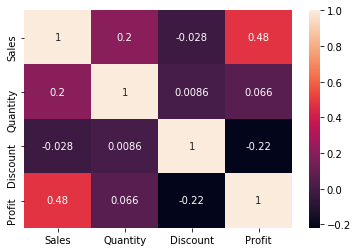

In [13]:
sbrn.heatmap(corelation,annot=True)

# PAIRPLOT

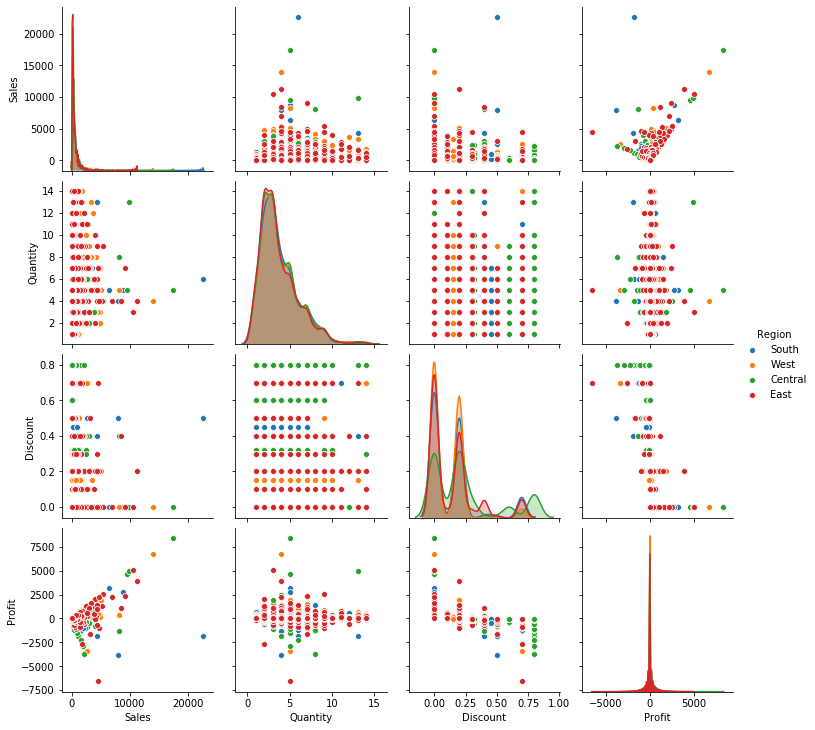

In [14]:
sbrn.pairplot(store,hue='Region')

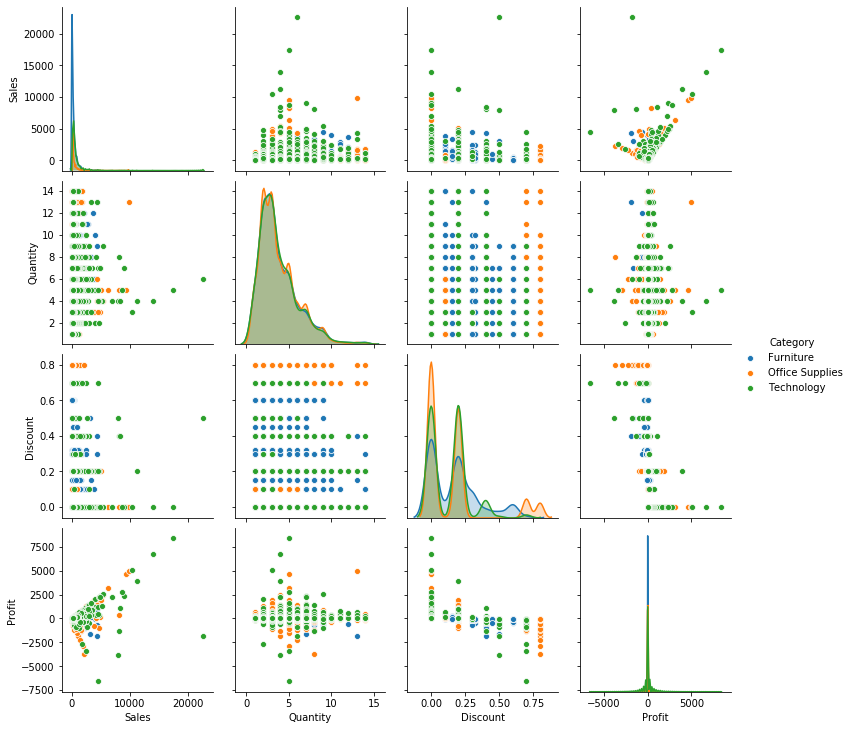

In [15]:
sbrn.pairplot(store,hue='Category')

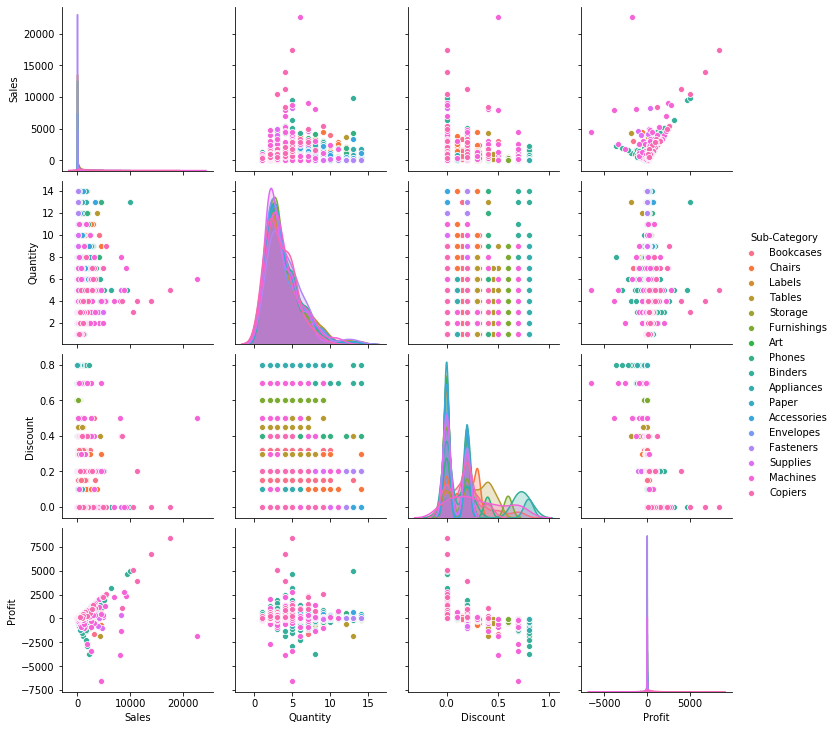

In [16]:
sbrn.pairplot(store,hue='Sub-Category')

# BAR-GRAPH

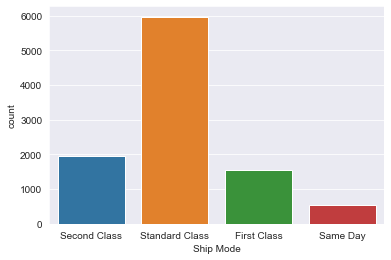

In [17]:
sbrn.set_style("darkgrid")
sbrn.countplot("Ship Mode",data=store)

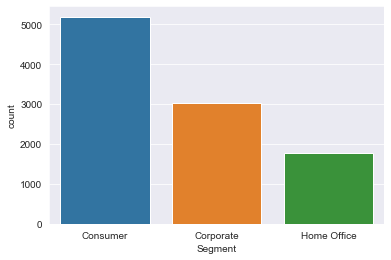

In [18]:
sbrn.set_style("darkgrid")
sbrn.countplot("Segment",data=store)

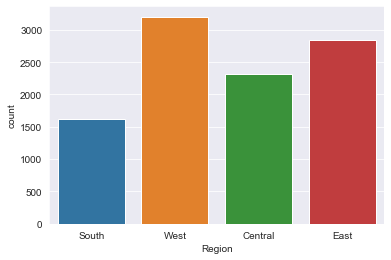

In [19]:
sbrn.set_style("darkgrid")
sbrn.countplot("Region",data=store)

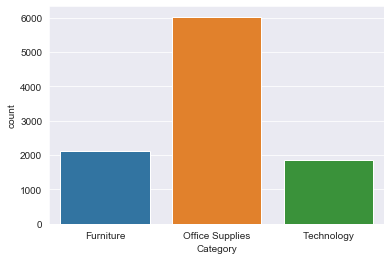

In [20]:
sbrn.set_style("darkgrid")
sbrn.countplot("Category",data=store)

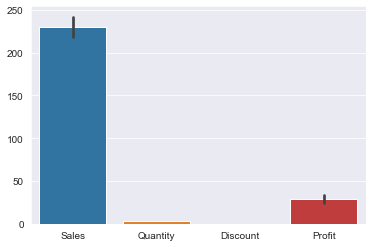

In [21]:
sbrn.barplot(data=store)

Text(0, 0.5, 'No of orders')

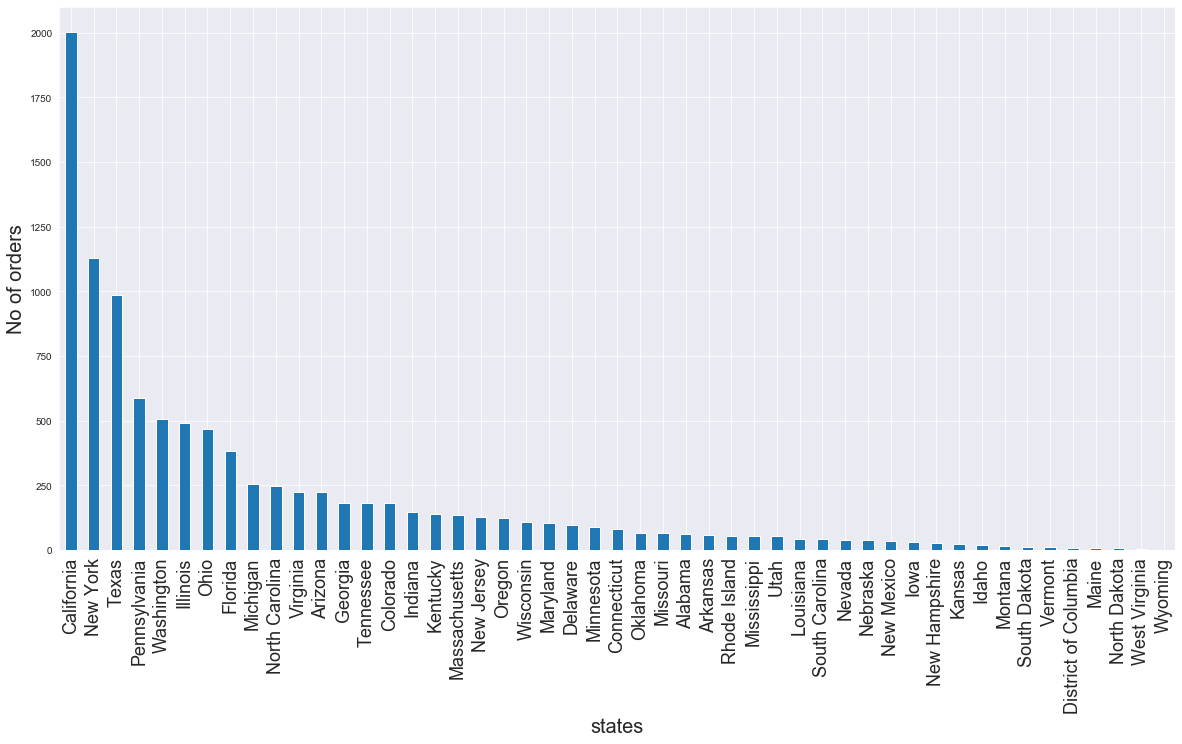

In [22]:
plt.figure(figsize=(20,10))
store["State"].value_counts().plot.bar()
plt.xlabel("states",size=20)
plt.xticks(size=18)
plt.ylabel("No of orders",size=20)

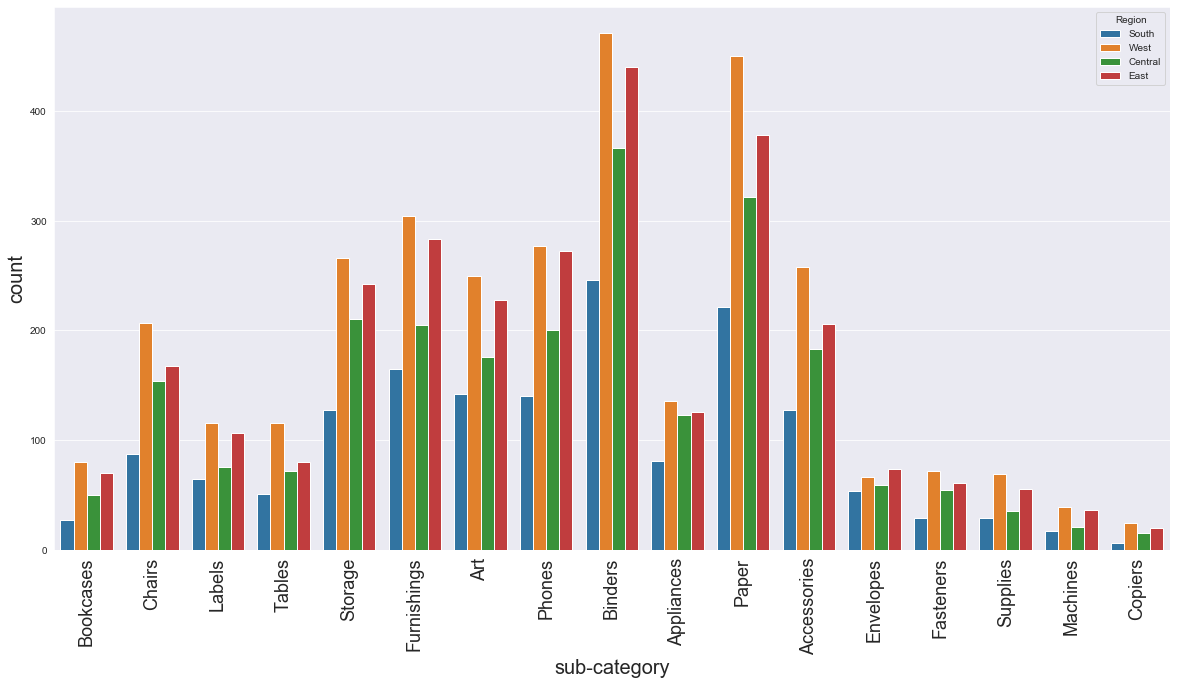

In [37]:
plt.figure(figsize=(20,10))
sbrn.countplot(x="Sub-Category",hue="Region",data=store)
plt.xlabel("sub-category",size=20)
plt.xticks(Rotation="vertical",size=18)
plt.ylabel("count",size=20)
plt.show()

# Line Plot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 1440x720 with 0 Axes>

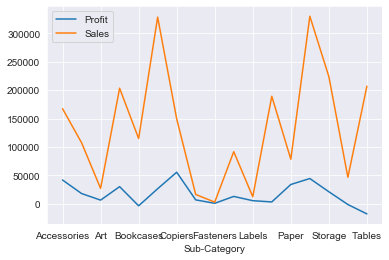

In [42]:
plt.figure(figsize=(20,10))
store.groupby("Sub-Category")["Profit","Sales"].agg(sum).plot.line()
plt.show()

# Pie Plot

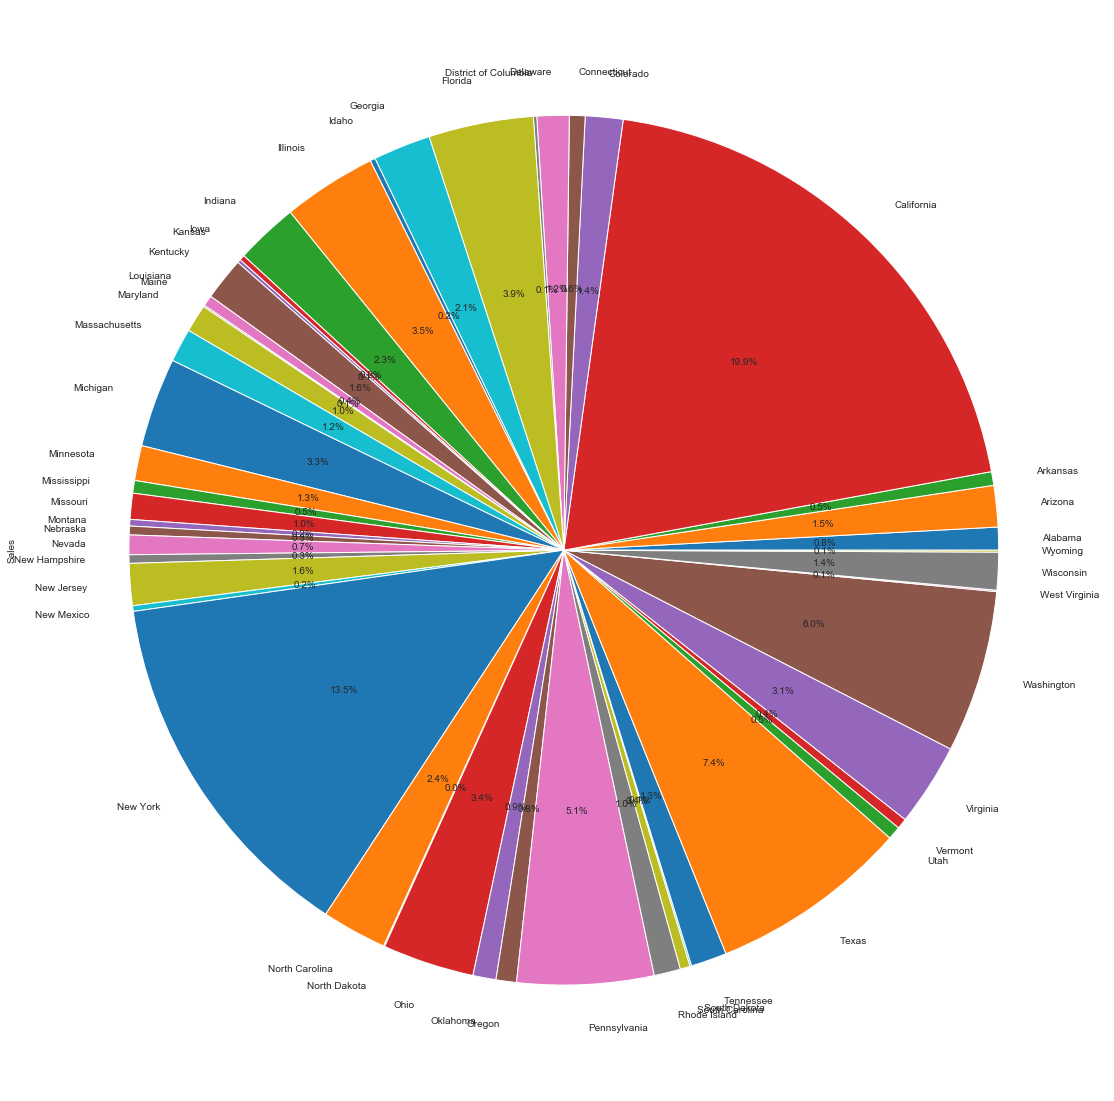

In [52]:
plt.figure(figsize=(40,20))
store.groupby("State").sum()["Sales"].plot.pie(autopct="%1.1f%%")
plt.show()

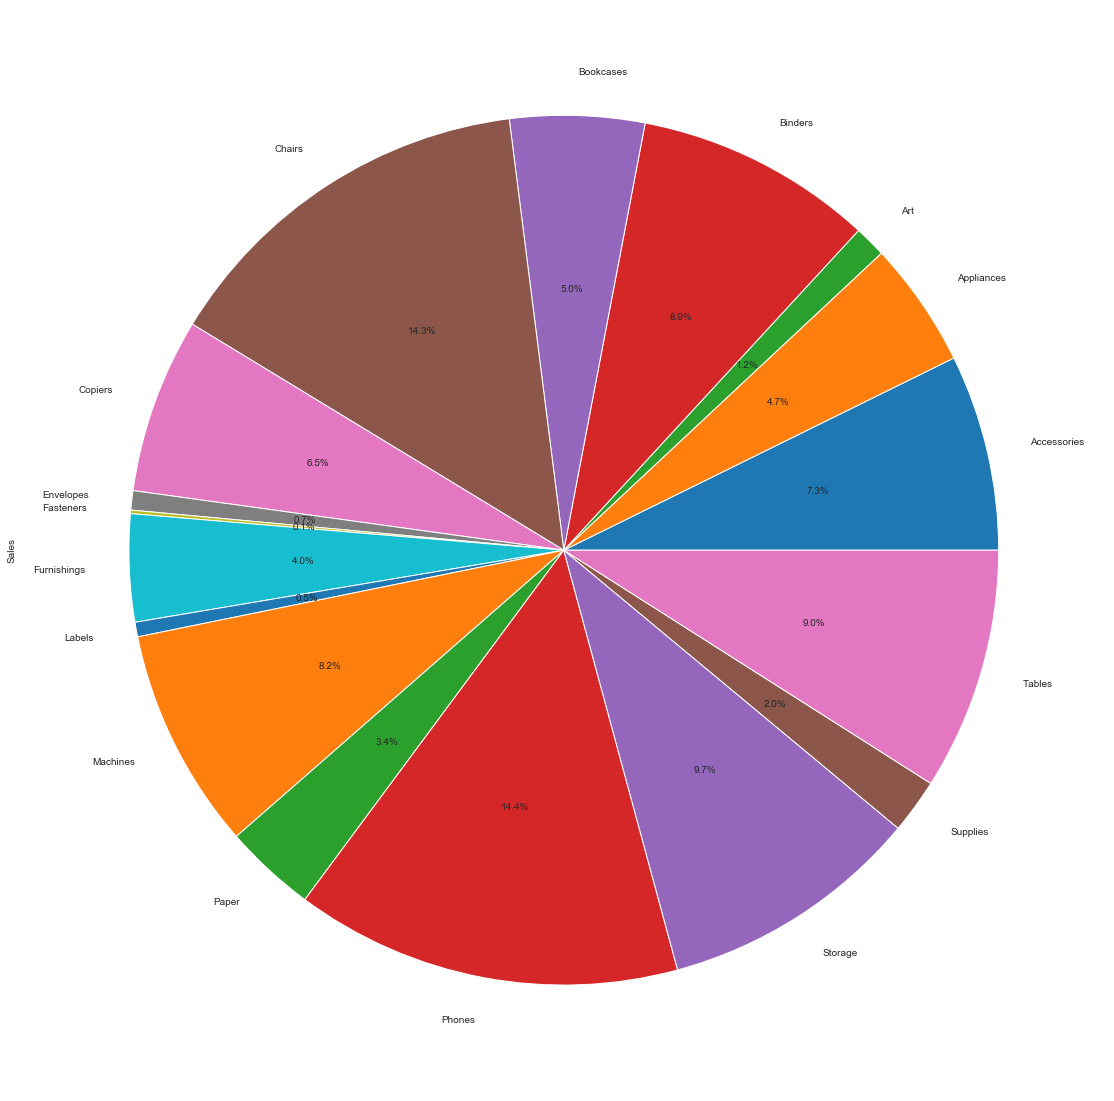

In [53]:
plt.figure(figsize=(40,20))
store.groupby("Sub-Category").sum()["Sales"].plot.pie(autopct="%1.1f%%")
plt.show()

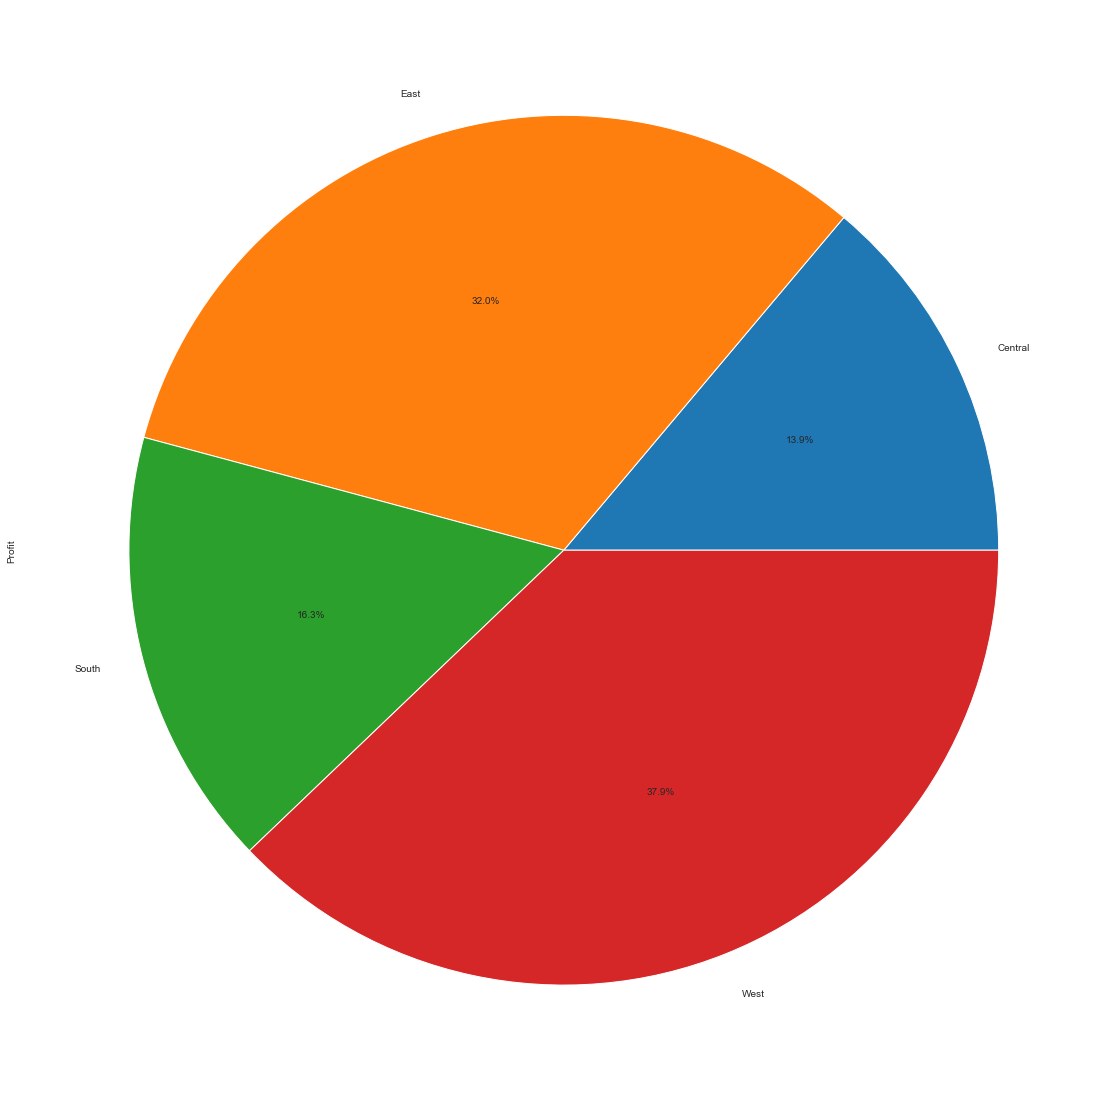

In [54]:
plt.figure(figsize=(40,20))
store.groupby("Region").sum()["Profit"].plot.pie(autopct="%1.1f%%")
plt.show()

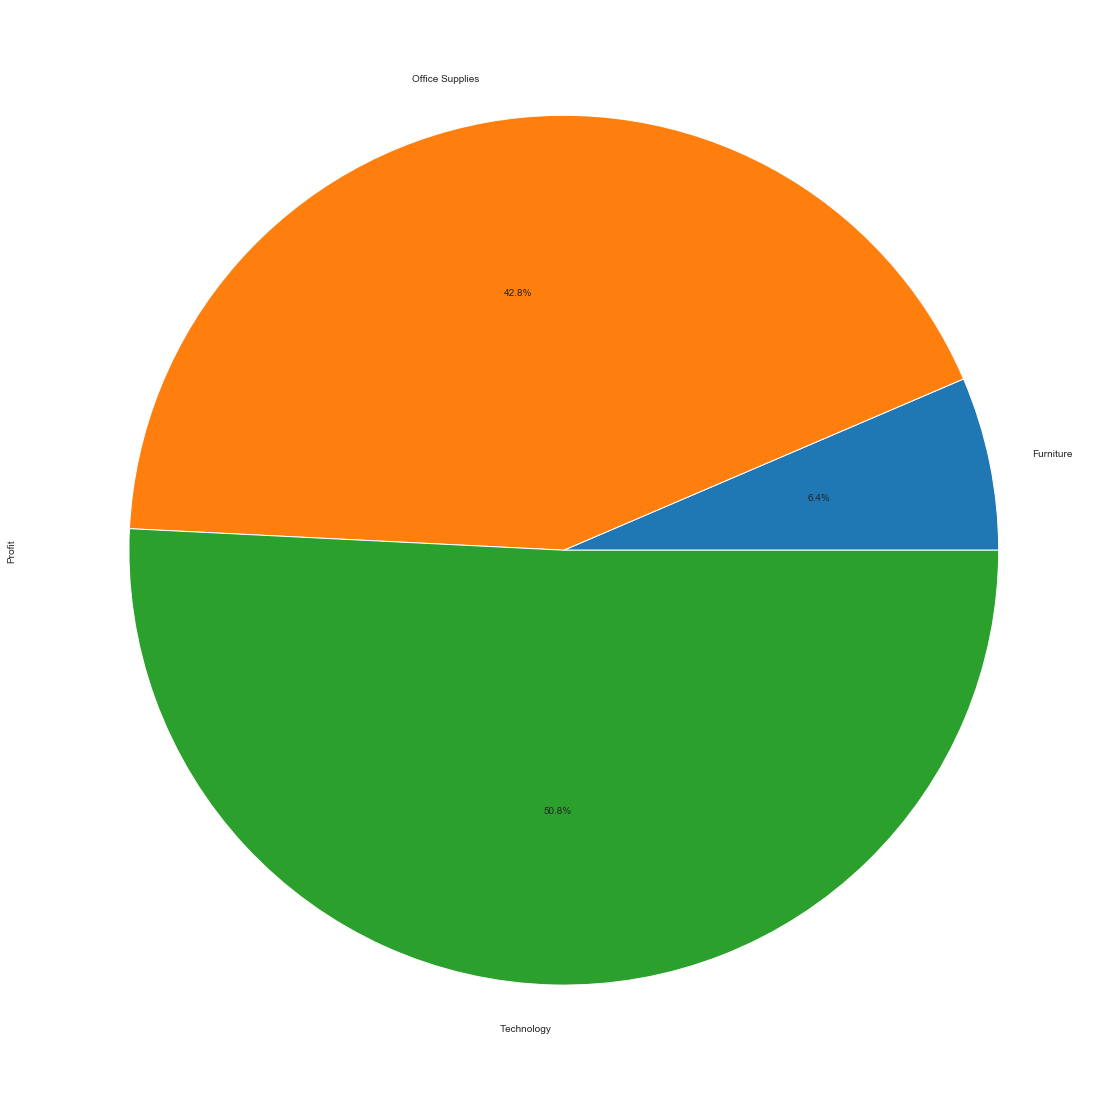

In [55]:
plt.figure(figsize=(40,20))
store.groupby("Category").sum()["Profit"].plot.pie(autopct="%1.1f%%")
plt.show()

# CONCLUSION:

Being a business manager we should work on the following weak areas to make more profit:-

1. Increase Efficiency
2. Increase Productivity
3. Increase Turnover
4. Reducing Cost
